In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Resampling

In [11]:
df = pd.read_csv('./dataset/shampoo_sales.csv', parse_dates=['Month'], index_col='Month', date_parser=lambda x:pd.datetime.strptime('190'+x, '%Y-%m'))
df

<ipython-input-11-768a74043290>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df = pd.read_csv('./dataset/shampoo_sales.csv', parse_dates=['Month'], index_col='Month', date_parser=lambda x:pd.datetime.strptime('190'+x, '%Y-%m'))


,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


## Upsampling data

In [12]:
upsampled = df.resample('D').mean()
upsampled

,Sales
Month,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN
...,...
1903-11-27,NaN
1903-11-28,NaN
1903-11-29,NaN


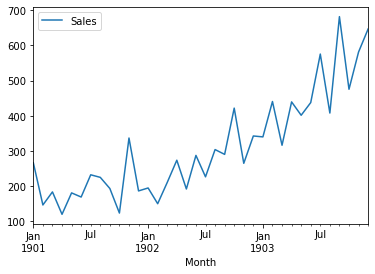

In [17]:
df.plot()
plt.show()

## Interpolating Data

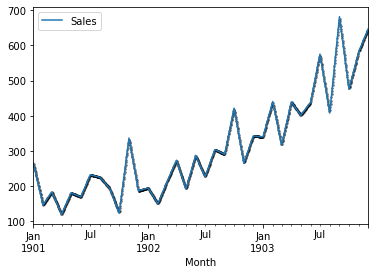

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
...,...
1903-11-27,638.153333
1903-11-28,640.340000
1903-11-29,642.526667


In [69]:
interpolated = upsampled.interpolate(method='linear')
interpolated.plot()
plt.scatter(y=interpolated.loc[upsampled[upsampled['Sales'].isnull()].index], x=upsampled[upsampled['Sales'].isnull()].index, color='k', s=3, alpha=.4)
plt.show()
display(interpolated)

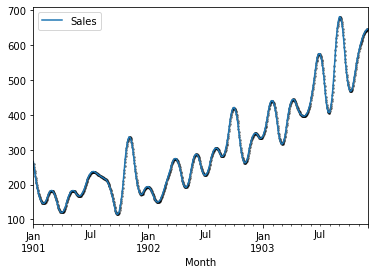

,Sales
Month,
1901-01-01,266.000000
1901-01-02,258.630160
1901-01-03,251.560886
1901-01-04,244.720748
1901-01-05,238.109746
...,...
1903-11-27,645.060131
1903-11-28,645.754167
1903-11-29,646.316013


In [71]:
interpolated = upsampled.interpolate(method='spline', order=2)
interpolated.plot()
plt.scatter(y=interpolated.loc[upsampled[upsampled['Sales'].isnull()].index], x=upsampled[upsampled['Sales'].isnull()].index, color='k', s=3, alpha=.4)
plt.show()
display(interpolated)

## DownSampling Data

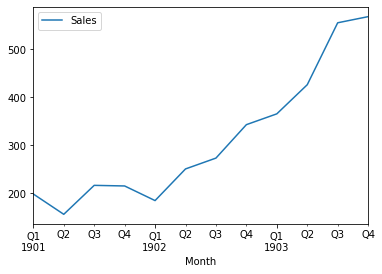

,Sales
Month,
1901-03-31,198.333333
1901-06-30,156.033333
1901-09-30,216.366667
1901-12-31,215.100000
1902-03-31,184.633333
1902-06-30,250.566667
1902-09-30,273.166667
1902-12-31,342.800000
1903-03-31,365.333333


In [75]:
quarter_month = df.resample('Q').mean()
quarter_month.plot()
plt.show()
display(quarter_month)

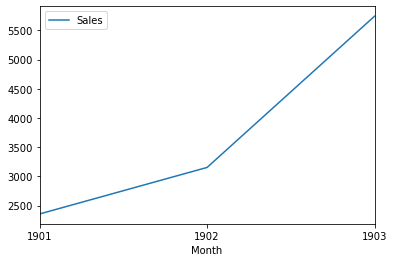

,Sales
Month,
1901-12-31,2357.5
1902-12-31,3153.5
1903-12-31,5742.6


In [76]:
quarter_month = df.resample('A').sum()
quarter_month.plot()
plt.show()
display(quarter_month)